First max number of bolts for each size
Assume bolt circle diameter 400mm
Assume required bolt spacing of 2.5 times the diameter
so each bolt occupies 3.5 diameter



In [63]:
import pandas as pd
import numpy as np
bolt_diameters = [0.016, 0.02, 0.024,  0.03]
for i in bolt_diameters:
    Bolt_no = 0.4 * np.pi / (3.5 * i)
    print('bolt_no', i, Bolt_no)


bolt_no 0.016 22.43994752564138
bolt_no 0.02 17.951958020513104
bolt_no 0.024 14.959965017094252
bolt_no 0.03 11.967972013675404


Injector face flange calculations takıng ınto account pressure


Assume M16 Bolts
Properties:https://thomsonrail.com/metric-nuts-and-bolts/ 



In [64]:
Table = {
    'M16': [ 'Proof Load', 'Max Tigthening Torque'],
    'Grade 8.8': [ '9,100kg', '247.5 Nm'],
    'Grade 9.8': [ '10,200kg', '277.4 Nm'],
    'Grade 10.9': ['13,000kg', '353.6 Nm'],
    'Grade 12.9': ['15,200kg', '413.4 Nm']
}


df_with_title = pd.DataFrame(Table)
df_with_title

,M16,Grade 8.8,Grade 9.8,Grade 10.9,Grade 12.9
0,Proof Load,"9,100kg","10,200kg","13,000kg","15,200kg"
1,Max Tigthening Torque,247.5 Nm,277.4 Nm,353.6 Nm,413.4 Nm


Total force

In [65]:
Injector_Face_Diameter = 0.317
Injector_Face_Area = Injector_Face_Diameter**2 * 0.25 * np.pi
Max_Pressure = 17.4e5
Force = Injector_Face_Area * 17.4e5;
print('force kN', Force/1000)
#Initial factor of safety of 3
Forcex3 = Force * 3

#Assume worst grade bolt
Bolt_no = Forcex3/(9100 * 9.81)
print('Bolt_no = ' , Bolt_no)

force kN 137.32754431246437
Bolt_no =  4.61496603530142


Clearly no problem with no of bolts required to hold the flange together

Compression
https://www.pipingguide.net/2013/02/gaskets-materials-compression-and.html 
for gasket 4.13e8 - 2e8 pascal required for compression

T = k* D * F  where T is the torque, K is the nut factor = 0.2 roughly, F is the desired bolt preload in Newtons d is the bolt diameter.


can assume a generic gasket for now https://www.lewvac.co.uk/product/copper-gaskets-for-cf-flanges/
CG350	DN350CF COPPER GASKET 376.7mm OD 356.5mm ID 2mm THK 1/PK

assume higher end value for the tightening torque


In [66]:
gasket_area = ((0.3767 **2) - (0.3565 **2)) * np.pi
bolt_tight_torque = [413, 809, 1395, 2774]
i = 0
for torque in bolt_tight_torque:
    
    F_pre_load_per_bolt = torque /( 0.2 * bolt_diameters[i])
    Bolt_no_compression = (4.13e8 * gasket_area) / F_pre_load_per_bolt
    print('F_pre_load_per_bolt =', bolt_diameters[i], F_pre_load_per_bolt)
    print('Bolt_no_compression',bolt_diameters[i], Bolt_no_compression)
    i += 1




F_pre_load_per_bolt = 0.016 129062.5
Bolt_no_compression 0.016 148.89279302068186
F_pre_load_per_bolt = 0.02 202250.0
Bolt_no_compression 0.02 95.01347885899507
F_pre_load_per_bolt = 0.024 290625.0
Bolt_no_compression 0.024 66.12120808337808
F_pre_load_per_bolt = 0.03 462333.3333333333
Bolt_no_compression 0.03 41.56411557151785


Not sure if we can compress a gasket?

Look at o rings
harder to find o ring required compression data.
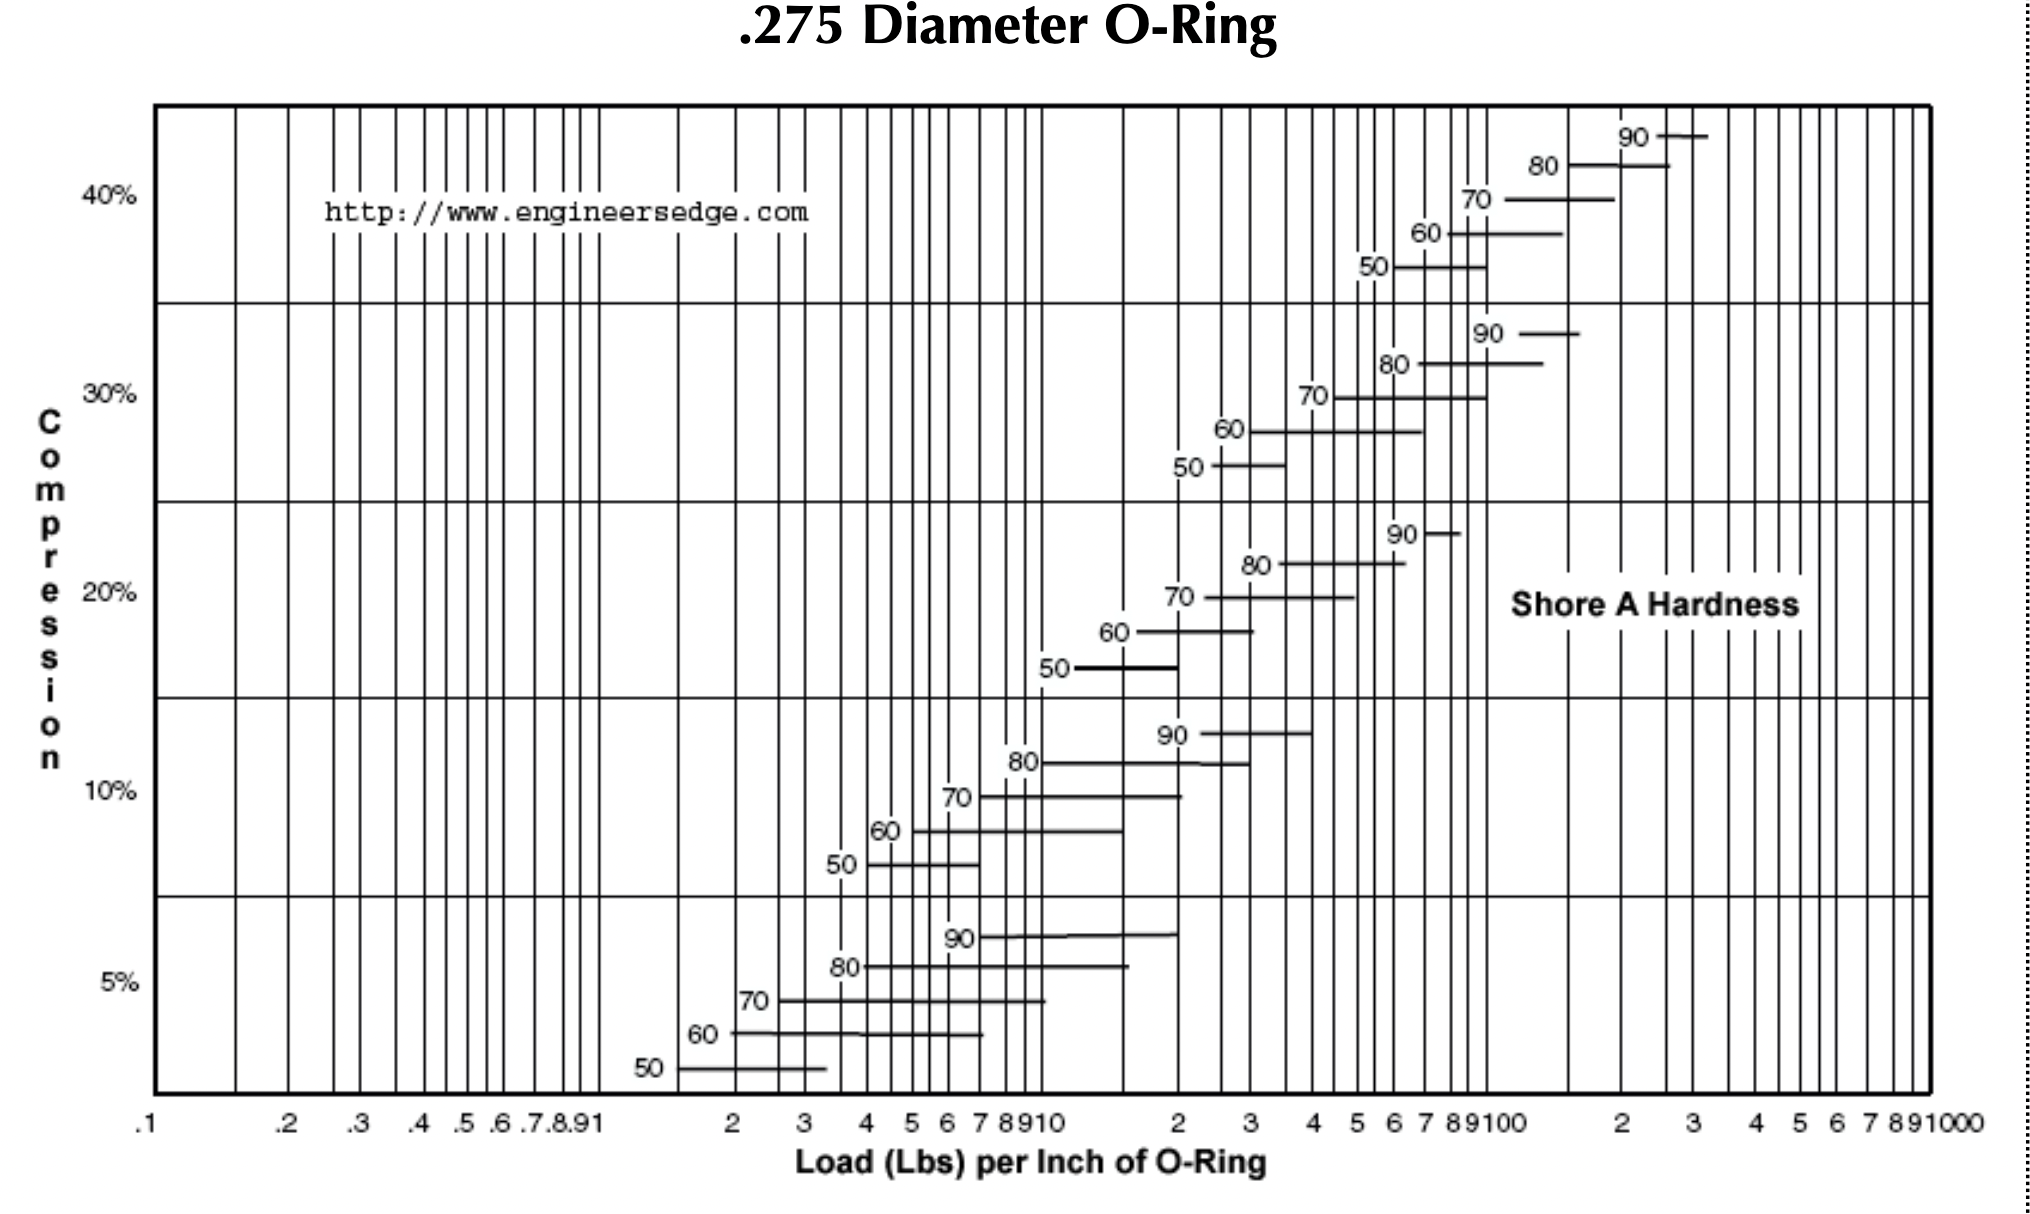

from the largest diameter https://www.engineersedge.com/general_engineering/oring_275__compression_load.htm 

Assume required O ring Diameter roughly 380mm

shore hardness of viton fkm ring from easter seals is 75 https://www.easternseals.co.uk/materials/fluorocarbon-%e2%80%a9viton-fkm/ 

Assume 30% compression so force per inch required is 80 pounds




In [67]:
total_force_required  = (0.38 * np.pi/0.0254) * 80 * 0.453592 * 9.81
print('total_force_required',total_force_required)
F_pre_load_per_bolt_16 = 247.5/0.0032
Bolt_no_ring = total_force_required/ (F_pre_load_per_bolt_16)
print('Bolt_no_ring',Bolt_no_ring)

total_force_required 16731.08607001338
Bolt_no_ring 0.21632111282441543


Maybe too easy to compress not sure? but also is pressure enough?

Reccomended pressure on sealing agent 4-6 times the pressure in tank


In [68]:
#rough area for o ring  assuming the 0.275 inch diameter with 30% change in diameter when compressed maybe a 10th of length in contact idk
Ring_area = 0.38 * np.pi * 0.275 * 0.0254 * 1.3 * 0.1
Sealing_pressure = total_force_required/Ring_area
print('Sealing_pressure bar',Sealing_pressure/1e5)
#not enough

Sealing_pressure bar 154.3408548299614


This should be enough and it is said that usually 4000 to 6000 psi is used to compress o rings so 400 - 275 bar. So I am probably underestimating. https://www.pipingguide.net/2013/02/gaskets-materials-compression-and.html 

This should work. A copper gasket would be preferable but doesnt look like we can compress it.

If using a O-Ring we can use M16s with a slightly larger difference of 3 diameters between bolts

In [69]:
No_of_bolts_suggested = (0.4 * np.pi)/(4 * 0.016)
print('No_of_bolts_suggested', round(No_of_bolts_suggested))

No_of_bolts_suggested 20
